# CHAPTER 6: Entropy and Divergence

### This code runs simulation for Example 14, and generates Figures 2 and 3 from Chapter 6: Entropy and Divergence (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

## *Example 6.14 - Change of coordinates*


If the coordinate system is modified and the parameter $\theta$ for the objective function is replaced by a transformed parameter vector $\theta'$ in the new space, then it is understandable that the gradient vector of the same objective function $J(\cdot)$ relative to $\theta'$ will generally point in a different search direction than the gradient vector relative to $\theta$.
 
Let $\theta=col\{x,y\} \in \mathbb{R}^{2}$ and consider a cost function of the form:

$$
J(\theta) = x^2 + (y-1)^2 \Longrightarrow \nabla_{\theta} J(\theta) = \begin{bmatrix} \partial J / \partial x & \partial J / \partial y \end{bmatrix} = \begin{bmatrix} 2x & 2(y-1) \end{bmatrix} \quad \text{(6.122)}
$$

Observe that $J(x,y)$ is quadratic over $\theta$. Applying the Newton recursion ($6.111$) to $J(x,y)$ would lead to its minimizer $(x^o,y^o) = [0\;1]^T$ in a single step.


 
 
Now assume we perform a change of variables to polar coordinates and let $x=r\cos\phi$ and $y=r\sin\phi$, where $\phi\in[-\pi,\pi]$. Define the new parameter vector $\theta'= col\{r, \phi \}$. Then, the same cost function can be written as

$$
J(\theta')=r^2+1-2r\sin\phi \Longrightarrow \nabla_{\theta'} J(\theta')=\begin{pmatrix}\frac{\partial J}{\partial r} & \frac{\partial J}{\partial \phi}\end{pmatrix}=\begin{pmatrix}2(r-\sin\phi) & -2r\cos\phi\end{pmatrix} \quad \text{(6.123)}
$$

The transformed cost function is not quadratic over $\theta'$, and applying Newton recursion ($6.111$) to $J(\theta')$ will not converge in a single step anymore; it may not even converge.

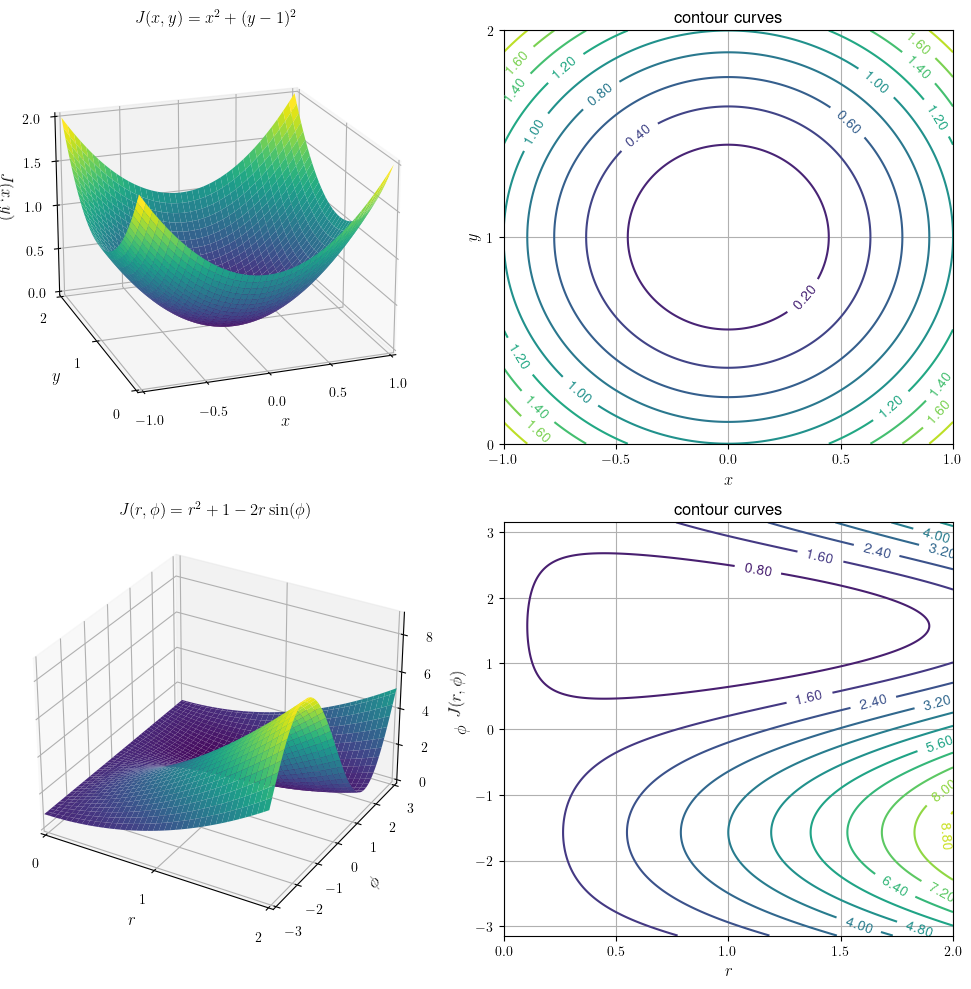

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# quadratic function g(z)
# J(x,y) = x^2 + (y-1)^2
# G(r,phi) = r^2 + 1-2*r*sin(phi)

# Generating data for g(z) in polar coordinates
ra, rb, dr = 0, 2, 0.01
phia, phib, dphi = -np.pi, np.pi, 0.01

r_values = np.arange(ra, rb + dr, dr)
phi_values = np.arange(phia, phib + dphi, dphi)
g = np.zeros((len(r_values), len(phi_values)))

for i, r in enumerate(r_values):
    for j, phi in enumerate(phi_values):
        g[i, j] = r**2 + 1 - 2*r*np.sin(phi)

# Generating data for f(x, y) in Cartesian coordinates
xa, xb, dx = -1, 1, 0.01
ya, yb, dy = 0, 2, 0.01

x_values = np.arange(xa, xb + dx, dx)
y_values = np.arange(ya, yb + dy, dy)
f = np.zeros((len(x_values), len(y_values)))

for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        f[i, j] = x**2 + (y-1)**2
        
# Plotting figure 2 (objective function and contour curves in Cartesian and polar coordinates)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(10, 10))

# subplot-1
ax1 = plt.subplot(221, projection='3d')
X, Y = np.meshgrid(x_values, y_values)
ax1.plot_surface(X, Y, f.T, cmap='viridis', edgecolor='none') # surface with contour plot under it
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)
ax1.set_xlim([-1,1])
ax1.set_ylim([0,2])
ax1.view_init(elev=20, azim=-110) # change the axis orientation to fit the figure in the book
ax1.set_zlabel('$J(x,y)$', fontsize=12, rotation=170)
ax1.set_title('$J(x,y)=x^2+(y-1)^2$', fontsize=12)
ax1.set_zticks(np.arange(0,2.5,0.5))
ax1.set_xticks(np.arange(-1,1.5,0.5))
ax1.set_yticks(np.arange(0,3,1))


# subplot-2 (Contour plot with custom labels)
plt.subplot(222)
contour_levels = 12
contour_plot = plt.contour(x_values, y_values, f.T, levels=contour_levels, cmap='viridis')
plt.clabel(contour_plot, fontsize=10, inline=1, fmt='%1.2f')
plt.xticks(np.arange(-1,1.5,0.5))
plt.yticks(np.arange(0,3,1))
plt.clabel(new_contour_plot, fontsize=10, inline=1, fmt='%1.2f')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('contour curves', fontsize=12)
plt.grid(True)


#subplot-3
ax3 = plt.subplot(223, projection='3d')
R, PHI = np.meshgrid(r_values, phi_values)
ax3.plot_surface(R, PHI, g.T, cmap='viridis', edgecolor='none') # surface with contour plot under it
ax3.set_xlabel('$r$', fontsize=12)
ax3.set_ylabel('$\phi$', fontsize=12)
ax3.set_xlim([0,2])
ax3.set_ylim([-3,3])
ax3.set_zlabel('$J(r,\phi)$', fontsize=12)
ax3.set_title('$J(r,\phi)=r^2+1-2r\sin(\phi)$', fontsize=12)
ax3.set_zticks(np.arange(0,9,2))
ax3.set_yticks(np.arange(-3,4,1))
ax3.set_xticks(np.arange(0,3,1))

# subplot-4 (Contour plot with custom labels)
plt.subplot(224)
contour_levels = 12
contour_plot = plt.contour(r_values, phi_values, g.T, levels=contour_levels, cmap='viridis')
plt.clabel(contour_plot, fontsize=10, inline=1, fmt='%1.2f')
plt.xticks(np.arange(0,2.5,0.5))
plt.yticks(np.arange(-3,4,1))
plt.clabel(new_contour_plot, fontsize=10, inline=1, fmt='%1.2f')
plt.xlabel('$r$', fontsize=12)
plt.ylabel('$\phi$', fontsize=12)
plt.title('contour curves', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

**Figure $6.2$** The plots in the top row show the objective function $J(\theta)=x^2+(y-1)^2$ in Cartesian coordinates and its contour curves. The plots in the bottom row show the same objective function in polar coordinates and its contour curves. 

Figure$~6.2$  plots the objective function in Cartesian and polar spaces, along with their contour curves. It is evident that a change in the coordinate system leads to a change in the behavior of the objective function. In particular, we can compare the gradient vectors at location $(x,y)=(1,1)$, which corresponds to $(r,\phi)=(\sqrt{2},{\pi\over 4})$, for both representations to find

$$
\nabla_{\theta} {J }(\theta)\Bigr|_{(x,y)=(1,1)}=\begin{bmatrix}2&0\end{bmatrix} \quad \text{(6.124a)}
$$

$$
\nabla_{\theta'} {J}(\theta')\Bigr|_{(r,\phi)=(\sqrt{2},{\pi\over 4})}=\begin{bmatrix}\sqrt{2}&-2\end{bmatrix} \quad \text{(6.124b)}
$$

Observe how the gradient vectors point in different directions and also have different norms.

The Hessian matrix of $J(\theta')$ is given by

$$
\nabla_{\theta'}^2 J(\theta')=\begin{pmatrix}2&-2\cos\phi\\-2\cos\phi&2r\sin\phi\end{pmatrix} \quad \text{(6.125)}
$$

so that if we were to apply Newton recursion ($6.111$) to it we get, after simplifications,

$$
\begin{pmatrix}r_m\\ \phi_m\end{pmatrix}=\begin{pmatrix}r_{m-1}\\\phi_{m-1}\end{pmatrix}-\frac{\mu}{4r_{m-1}\sin\phi_{m-1}-4\cos^2(\phi_{m-1})}\begin{pmatrix}4r_{m-1}(r_{m-1}\sin\phi_{m-1}-1)\\-2\sin(2\phi_{m-1})\end{pmatrix} \quad \text{(6.126)}
$$

The initial conditions for the parameters $(r,\phi)$ need to be chosen close enough to the minimizer, which we know occurs at $(r^o,\phi^o)=(1,\pi/2)$. We run the recursion with $\mu=0.01$, $M=500$ iterations, and consider two different sets of initial conditions $(r_{-1},\phi_{-1})=(0.9,1.4)$ and $(r_{-1},\phi_{-1})=(0.2,0.5)$. The first choice is close to the minimizer, while the second choice is away from it. We observe from the plots in Figure$~6.3$ that convergence occurs in one case but not the other.


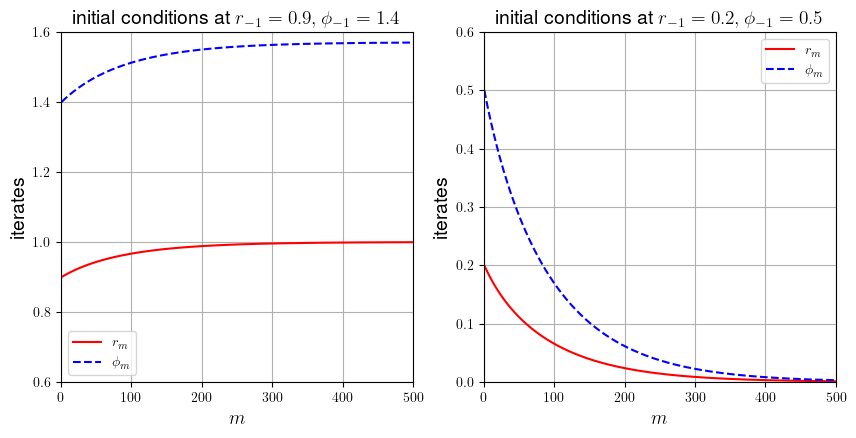

In [54]:
## Newton recursion in polar coordinates
M = 500
r = np.zeros(M)
phi = np.zeros(M)
r[0] = 0.9 # one set of initial conditions
phi[0] = 1.4
mu = 0.01
m = 1

for m in range(1,M) :
   a = 4*r[m-1]*r[m-1]*np.sin(phi[m-1]) - 4*r[m-1]
   b = -2*np.sin(2*phi[m-1])
   d = 4*r[m-1]*np.sin(phi[m-1])-4*np.cos(phi[m-1])*np.cos(phi[m-1])
   
   r[m]= r[m-1] - mu*a/d
   phi[m] = phi[m-1] - mu*b/d
    
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(range(1, M+1), r, 'r', label='$r_m$')
plt.plot(range(1, M+1), phi, '--b', label='$\phi_m$')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
normal_text = "initial conditions at"
latex_expression = r'$r_{-1}=0.9, \phi_{-1}=1.4$'
title_text = normal_text + " " + latex_expression
plt.title(title_text, fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0.6, 1.7, 0.2))
plt.xlim([0,500])
plt.ylim([0.6,1.6])
plt.grid()
plt.legend()

r[0] = 0.2 # a second set of initial conditions
phi[0] = 0.5
m = 1

for m in range(1,M) :
   a = 4*r[m-1]*r[m-1]*np.sin(phi[m-1]) - 4*r[m-1]
   b = -2*np.sin(2*phi[m-1])
   d = 4*r[m-1]*np.sin(phi[m-1])-4*np.cos(phi[m-1])*np.cos(phi[m-1])
   
   r[m]= r[m-1] - mu*a/d
   phi[m] = phi[m-1] - mu*b/d
    

plt.subplot(222)
plt.plot(range(1, M+1), r, 'r', label='$r_m$')
plt.plot(range(1, M+1), phi, '--b', label='$\phi_m$')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
normal_text = "initial conditions at"
latex_expression = r'$r_{-1}=0.2, \phi_{-1}=0.5$'
title_text = normal_text + " " + latex_expression
plt.title(title_text, fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0, 0.7, 0.1))
plt.xlim([0,500])
plt.ylim([0,0.6])
plt.grid()
plt.legend()
plt.show()

**Figure $6.3$** Evolution of the iterates $(r_m,\phi_m)$ for Newton recursion ($6.126$) for two different choices of the initial conditions. The plots on the left converge to the location of the global minimizer at $(r^o,\phi^o)=(1,\pi/2)$